# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [1]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [2]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv(r'C:\Users\Олександр\Desktop\Лабораторный работы\Лабы МН\apartments_clean.csv')
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,type,district,area_comfort
0,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,площа,Оболонський,10.0
1,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,вулиця,Оболонський,13.0
2,135000.0,2.0,2077.0,16.0,23.0,2012.0,65.0,25.0,18.0,Дніпровська,вулиця,Оболонський,22.0
3,84000.0,2.0,1273.0,6.0,26.0,2009.0,66.0,37.0,18.0,Дніпровська,вулиця,Оболонський,11.0
4,60000.0,1.0,1463.0,2.0,26.0,2009.0,41.0,37.0,14.0,Дніпровська,вулиця,Оболонський,-10.0


## 1. Визначення типів покажчиків вхідного датасету

In [3]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = target = data['Price']
data = data.drop(['Price'], axis=1)

In [4]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((376,), (376, 12))

In [5]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector as selector

In [6]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = selector(dtype_include=np.number)
category_selector = selector(dtype_include='object')

In [7]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen', 'area_comfort']
список категоріальних покажчиків = ['street', 'type', 'district']


In [8]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data[numeric_data_columns]
data_category = data[category_data_columns]

data_numeric.shape, data_category.shape

((376, 9), (376, 3))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [9]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [11]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max= min_max_scaler.fit_transform(data_numeric)

<AxesSubplot:title={'center':'Нормалізація'}, ylabel='Frequency'>

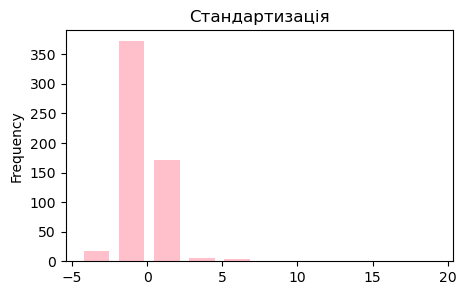

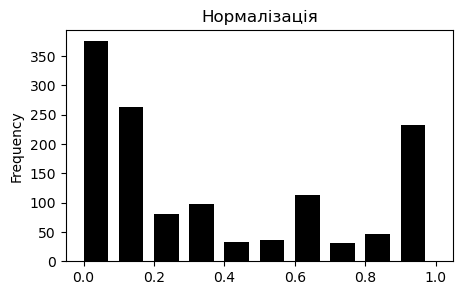

In [12]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні
pd.DataFrame(data_numeric_std).plot(kind='hist', legend=False, color='pink', 
figsize=[5, 3], width=1.7, title='Стандартизація')

pd.DataFrame(data_numeric_min_max).plot(kind='hist', legend=False, color='black', 
figsize=[5, 3], width=0.07, title='Нормалізація')


#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

### 2.1. Маштабування категоріальних показчиків

In [13]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [14]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати
ordinal_Encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

In [15]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = ordinal_Encoder.fit_transform(data_numeric)
one_hot_encoder = onehot_encoder.fit_transform(data_category)

## 3. Побудова трансформера для підготовки даних

In [16]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer

In [17]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_data_columns),
        ('cat', OneHotEncoder(), category_data_columns)
    ])
print(transformer)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen', 'area_comfort']),
                                ('cat', OneHotEncoder(),
                                 ['street', 'type', 'district'])])


In [18]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = transformer.fit_transform(data)
data_transformed.shape

(376, 201)

In [19]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
apartment_transformed = pd.concat([pd.DataFrame(target, columns=['target']), pd.DataFrame(data_transformed)], axis=1)

In [20]:
# Проінспектувати вихідний датасет `apartment_transformed`
print(apartment_transformed.head())

  target                                                  0
0    NaN    (0, 0)\t-1.1356808803413219\n  (0, 1)\t-0.13...
1    NaN    (0, 0)\t-0.17609433874955333\n  (0, 1)\t-0.1...
2    NaN    (0, 0)\t-0.17609433874955333\n  (0, 1)\t-0.0...
3    NaN    (0, 0)\t-0.17609433874955333\n  (0, 1)\t-0.1...
4    NaN    (0, 0)\t-1.1356808803413219\n  (0, 1)\t-0.09...


In [21]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv', index=False)